# Factor Elimination and Jointrees

**COMP9418-19T3, W08 Tutorial**

- Instructor: Gustavo Batista
- School of Computer Science and Engineering, UNSW Sydney
- Notebook designed by Gustavo Batista and Jeremy Gillen
- Last Update 18th August 2021

In this week's tutorial, we will implement the Factor Elimination (FE) algorithm using elimination tree and jointrees. This algorithm will allow us to answer queries about cluster marginals for all clusters in the elimination tree with the same time complexity of the Variable Elimination algorithm.

## Technical prerequisites

You will need certain packages installed to run this notebook.

If you are using ``conda``'s default
[full installation](https://conda.io/docs/install/full.html),
these requirements should all be satisfied already.

To render a visualization of some graphical models, you also need to install Graphviz [download page](http://www.graphviz.org/download). We have already used this library in Tutorial 1, thus, you should have it installed. If you do not have it and use the conda installation, then use the command ```conda install python-graphviz```. 

Once we have done all that, we
import some useful modules for later use.

In [ ]:
# visualise graphs
import graphviz
# visualise plots
import copy

In [ ]:
from DiscreteFactors import Factor
from Graph import Graph
from BayesNet import BayesNet

## The ICU network

Once again we will use a subset of the ICU-Alarm network as a benchmark. However, our code will run for any network. We include here a graphical representation so that you can remember the variables and the dependencies between them.

![ICU Graph](img/ICU_graph.png "Graph exercise")

We first include all the factors that represent the CPTs of the nine variables in the subset of the ICU-Alarm network. We put them all in a dictionary for later. We also define the outcomeSpace of each variable.

In [ ]:
# Outcome space of each random variable
outcomeSpace = dict(
    H=(0,1),
    L=(0,1),
    A=(0,1),
    V=(0,1),
    S=(0,1),
    T=(0,1),
    C=(0,1,2),
    O=(0,1,2),
    B=(0,1,2),
)
factor_dict = {}

# Factors for each one of the ICU_Net object
h = Factor(('H',), outcomeSpace)
h[0] = 0.8
h[1] = 0.2
factor_dict['H'] = h

v = Factor(('L', 'H', 'V'), outcomeSpace)
v[0, 0, 0] = 0.05
v[0, 0, 1] = 0.95
v[0, 1, 0] = 0.99
v[0, 1, 1] = 0.01
v[1, 0, 0] = 0
v[1, 0, 1] = 1
v[1, 1, 0] = 1
v[1, 1, 1] = 0
factor_dict['V'] = v

c = Factor(('V', 'C'), outcomeSpace)
c[0, 0] = 0.94
c[0, 1] = 0.04
c[0, 2] = 0.02
c[1, 0] = 0.02
c[1, 1] = 0.26
c[1, 2] = 0.72
factor_dict['C'] = c

l = Factor(('L',), outcomeSpace)
l[0] = 0.95
l[1] = 0.05
factor_dict['L'] = l

s = Factor(('L','H','S'), outcomeSpace)
s[0, 0, 0] = 0.04
s[0, 0, 1] = 0.96
s[0, 1, 0] = 0.48
s[0, 1, 1] = 0.52
s[1, 0, 0] = 0.95
s[1, 0, 1] = 0.05
s[1, 1, 0] = 0
s[1, 1, 1] = 1
factor_dict['S'] = s

o = Factor(('S', 'V', 'O'), outcomeSpace)
o[0, 0, 0] = 0.97
o[0, 0, 1] = 0.01
o[0, 0, 2] = 0.02
o[0, 1, 0] = 0.78
o[0, 1, 1] = 0.19
o[0, 1, 2] = 0.03
o[1, 0, 0] = 0.22
o[1, 0, 1] = 0.76
o[1, 0, 2] = 0.02
o[1, 1, 0] = 0.01
o[1, 1, 1] = 0.01
o[1, 1, 2] = 0.98  
factor_dict['O'] = o

t = Factor(('A','T'), outcomeSpace)
t[0, 0] = 0.30
t[0, 1] = 0.70
t[1, 0] = 1
t[1, 1] = 0
factor_dict['T'] = t

b = Factor(('O', 'T', 'B'), outcomeSpace)
b[0, 0, 0] = 1
b[0, 0, 1] = 0
b[0, 0, 2] = 0
b[0, 1, 0] = 0.30
b[0, 1, 1] = 0.62
b[0, 1, 2] = 0.08
b[1, 0, 0] = 0.93
b[1, 0, 1] = 0.07
b[1, 0, 2] = 0
b[1, 1, 0] = 0.02
b[1, 1, 1] = 0.49
b[1, 1, 2] = 0.49
b[2, 0, 0] = 0.90
b[2, 0, 1] = 0.08
b[2, 0, 2] = 0.02
b[2, 1, 0] = 0.01
b[2, 1, 1] = 0.08
b[2, 1, 2] = 0.91 
factor_dict['B'] = b

a = Factor(('A',), outcomeSpace)
a[0] = 0.99
a[1] = 0.01
factor_dict['A'] = a

## Elimination Tree

Elimination tree is a data structure that informs the order we will eliminate the factors. We will define an elimination tree and provide it as input to the FE algorithm. 

In an elimination tree, each node of the tree corresponds to one or more factors in the network, although one network factor per node is the most common. In the figure below, we copy the nodes of the ICU Alarm network. We linked the nodes, intending to keep the cluster sizes small. Remember that the width of the elimination tree is defined as the size of the largest cluster minus one.

![Elimination Tree](img/elimination_tree.png "Elimination Tree")

Let's start constructing an EliminationTree class. Similar to a BayesNet, the two required data structures are a graph and the required factors.

In [ ]:
class EliminationTree():
    def __init__(self, graph, outcomeSpace, factor_dict=None):
        self.graph = graph
        self.factors = copy.deepcopy(factor_dict)
        self.outcomeSpace = outcomeSpace

### Exercise

In the next cell, declare the elimination tree specified in the figure above. Remember the tree is an undirected graph.

In [ ]:
g = Graph(dict(
    L= ('S',),
    H= ('S',),
    ... # TODO
))

eTree = EliminationTree(g, outcomeSpace, factor_dict)


##############
# Test code

pos = {
    'B': '1,0!',
    'O': '0,1!',
    'C': '1,1!',
    'T': '2,1!',
    'S': '0,2!',
    'V': '1,2!',
    'A': '2,2!',
    'L': '0,3!',
    'H': '1,3!',
}
eTree.graph.show(directed=False, positions=pos)


SyntaxError: positional argument follows keyword argument (<ipython-input-5-6efb7818477c>, line 4)

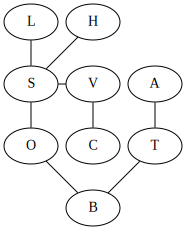

In [ ]:
# Answer

g = Graph(dict(
    L= ('S',),
    H= ('S',),
    C= ('V',),
    V= ('C', 'S'),
    S= ('L', 'H', 'V', 'O'),
    O= ('S', 'B'),
    B= ('O', 'T'),
    T= ('B', 'A'),
    A= ('T',)
))

eTree = EliminationTree(g, outcomeSpace, factor_dict)


##############
# Test code

pos = {
    'B': '1,0!',
    'O': '0,1!',
    'C': '1,1!',
    'T': '2,1!',
    'S': '0,2!',
    'V': '1,2!',
    'A': '2,2!',
    'L': '0,3!',
    'H': '1,3!',
}
eTree.graph.show(directed=False, positions=pos)

Now we'll extend the class to store separators, and display them when showing the tree.

In [ ]:
class EliminationTree():
    def __init__(self, graph, separators, outcomeSpace, factor_dict=None):
        self.graph = graph
        self.separators = separators # dict mapping each edge (node1, node2) -> tuple of separator vars
        self.factors = copy.deepcopy(factor_dict)
        self.outcomeSpace = outcomeSpace

    def show(self, positions=None):
        '''
        A specialised function to show Elimination Trees, including the separators
        '''
        dot = graphviz.Graph(engine="neato", comment='Undirected graph', strict=True)        
        dot.attr(overlap="false", splines="true")
        for v in self.graph:
            if positions is not None:
                dot.node(str(v), pos=positions[v])
            else:
                dot.node(str(v))
        for v in self.graph:
            for w in self.graph.children(v):
                if v < w:
                    dot.edge(str(v), str(w), ','.join(self.separators[str(v)+str(w)]))

        return dot

An important piece of information in the elimination tree is the separator. Separators are associated with edges of the elimination tree. In an $i-j$ edge, the separator is defined as $S_{ij} = vars(i) \cap vars(j)$, where $vars(k)$ are the variables that appear in the factors in the $k$ side of the edge. 

Separators are relevant because they inform us which variables can be eliminated. In other words, the message associated with an edge $i-j$ is guaranteed to be over the separator $S_{ij}$. Therefore, we need to eliminate all other variables not present in $S_{ij}$ before sending the message.

We need to have quick access to separators, so let's declare them in a Python dictionary. Since $S_{ij} = S_{ji}$, we can adopt a canonical form and maintain just one of them. We have added a separators variable to the EliminationTree class, and a new `show` function to better show the graph (including clusters and separators).


## Exercise 

Declare a dictionary with separators for each edge. For an edge $i-j$ declare only $S_{ij}$ such that $i$ precedes $j$ in alphabetical order.

In [ ]:
# Notice we declare LS = ('L'). You do not need to declare SL = ('L'). The code only checks for separators declared in lexical order
s = dict(
    LS= ('L',),
    HS= ('H',),
    CV= ...,  # TODO
    SV= ...,
    OS= ...,
    BO= ...,
    BT= ...,
    AT= ...,
)

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)


##############
# Test code


pos = {
    'B': '1,0!',
    'O': '0,1!',
    'C': '1,1!',
    'T': '2,1!',
    'S': '0,2!',
    'V': '1,2!',
    'A': '2,2!',
    'L': '0,3!',
    'H': '1,3!',
}

eTree.show(pos)


TypeError: can only join an iterable

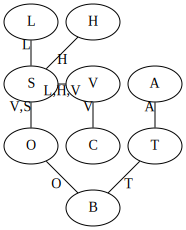

In [ ]:
# Answer

# Notice we declare LS = ('L'). You do not need to declare SL = ('L'). The code only checks for separators declared in lexical order

s = dict(
    LS= ('L',),
    HS= ('H',),
    CV= ('V',),
    SV= ('L','H','V'),
    OS= ('V','S'),
    BO= ('O',),
    BT= ('T',),
    AT= ('A',)
)

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)


##############
# Test code


pos = {
    'B': '1,0!',
    'O': '0,1!',
    'C': '1,1!',
    'T': '2,1!',
    'S': '0,2!',
    'V': '1,2!',
    'A': '2,2!',
    'L': '0,3!',
    'H': '1,3!',
}

eTree.show(pos)

## Propagating Messages

We will now implement the code to propagate the messages over the elimination tree. The main steps in the algorithm are the following:

1. Choose a root node $r$ in the tree $T$
2. Pull/collect messages towards root $r$
3. Push/distribute messages away from root $r$
5. return $\phi_i \prod_k M_{ki}$ for each node $i$ in tree $T$

We can implement the pull step using a depth-first search. The general idea is to use the "backtracking" step of the recursion to calculate the messages. In other words, we start a depth-first search from the root $r$ until be find a dead-end. Such a dead-end is a node with only one neighbour. Therefore, we can calculate the message and associate to the edge between the dead-end node and its neighbour. This message is guaranteed to be towards the root.

When we finish the pull step, we can also use a depth-first search to implement push step. In this case, we calculate a message every time we traverse an edge. Differently from the pull step, we will use the "forward" part of the recursion, so we guarantee the message is directed away from the root.

One final, and important detail. The messages are calculated according to the following equation:

$M_{ij} = project(\phi_i \prod_{k \neq j} M_{ki},S_{ij})$

where $project(\phi, S_{ij})$ is an operation that removes (by marginalization) all variables in $\phi_i$ but the ones in $S_{ij}$.

The critical detail here is that when we compute a message from node $i$ to $j$ we multiply all incoming messages to $i$ except for the message from $j$. 


### Exercise

We will implement the code to compute messages for all edges in the elimination tree. For each undirected edge there will be two messages: one $M_{ij}$ and the other $M_{ji}$. The messages are stored in a dictionary, so we can easily retrieve them later. Similarly to separators, we use as key the concatenation of the names of the nodes.

Let's start with the function `getMessage` that calls two auxiliary functions: `pull` and `push`.

In [ ]:
class EliminationTree(EliminationTree):
    def __init__(self, graph, separators, outcomeSpace, factor_dict=None):
        self.graph = graph
        self.separators = separators # dict mapping each edge (node1, node2) -> tuple of separator vars
        self.factors = copy.deepcopy(factor_dict)
        self.outcomeSpace = outcomeSpace

        self.messages = None

    def getMessages(self):
        '''
        Propagate messages around the tree
        '''
        
        # it doesn't matter which node we choose as the root node
        root = ... # TODO

        # Initialize dictionary to store messages. The message key will be concatenation of nodes names
        self.messages = dict()
        # For each neighbouring node of root, we start a depth-first search
        for v in self.graph.children(root):
            # Call pull and store the resulting message in messages[v+root]
            self.messages[v+root] = ... # TODO

        # Call push to recursively push messages out from the root. To start it off, set the previous node to '' or None.                 
        ... # TODO
        
        return self.messages

    def pull(self, curr, previous):
        """
        argument 
        `curr`, current node.
        `previous`, node we came from in the search.
        
        Returns a factor fx with a message from node previous to root
        """
        # fx is an auxiliary factor. Initialize fx with the factor associated with the curr node (use the copy method to copy it)
        fx = ... # TODO
        # Depth-first search
        for v in self.graph.children(curr):
            # This is an important step: avoid returning using the edge we came from
            if not v == previous:
                # Call pull recursively since root is not an edge with a single neighbour
                self.messages[v+curr] = ... # TODO
                # Here, we returned from the recursive call. 
                # We need to join the received message with fx
                fx = ... # TODO
        # fx has all incoming messages multiplied by the node factor. It is time to marginalize the variables not is S_{ij}
        for v in fx.domain:
            if not v in self.separators[''.join(sorted([previous,curr]))]:
                # Call marginalize to remove variable v from fx's domain
                fx = ... # TODO
        return fx

    def push(self, curr, previous):
        """
        argument 
        `curr`, current node.
        `previous`, previous node.
        """    
        for v in self.graph.children(curr):
            # This is an important step: avoid returning using the edge we came from        
            if not v == previous:
                # Initialize messages[curr+v] with the factor associated with the curr node (make sure to copy it)
                self.messages[curr+v] = ... # TODO
                for w in self.graph.children(curr):
                    # This is an important step: do not consider the incoming message from v when computing the outgoing message to v
                    if not v == w:
                        # Join messages coming from w into messages[curr+v]
                        self.messages[curr+v] = ... # TODO

                # messages[curr+v] has all incoming messages multiplied by the node factor. It is time to marginalize the variables not is S_{ij}
                for w in self.messages[curr+v].domain:
                    if not w in self.separators[''.join(sorted([v,curr]))]:
                        # Call marginalize to remove variable v from messages[curr+v] domain
                        self.messages[curr+v] = ... # TODO
                # Call push recursively and go to the next node v
                self.push(v, curr)

In [ ]:
# Answer

class EliminationTree(EliminationTree):
    def __init__(self, graph, separators, outcomeSpace, factor_dict=None):
        self.graph = graph
        self.separators = separators # dict mapping each edge (node1, node2) -> tuple of separator vars
        self.factors = copy.deepcopy(factor_dict)
        self.outcomeSpace = outcomeSpace

        self.messages = None

    def getMessages(self):
        '''
        Propagate messages around the tree
        '''
        root = list(self.graph)[0] # it doesn't matter which node we choose as the root node

        # Initialize dictionary to store messages. The message key will be concatenation of nodes names
        self.messages = dict()
        # For each neighbouring node of root, we start a depth-first search
        for v in self.graph.children(root):
            # Call pull and store the resulting message in messages[v+root]
            self.messages[v+root] = self.pull(v, root)

        # Call push to recursively push messages out from the root. To start it off, set the previous node to '' or None.                 
        self.push(root, '')
        
        return self.messages

    def pull(self, curr, previous):
        """
        argument 
        `curr`, current node.
        `previous`, node we came from in the search.
        
        Returns a factor fx with a message from node previous to root
        """
        # fx is an auxiliary factor. Initialize fx with the factor associated with the curr node
        fx = self.factors[curr].copy()
        # Depth-first search
        for v in self.graph.children(curr):
            # This is an important step: avoid returning using the edge we came from
            if not v == previous:
                # Call pull recursively since root is not an edge with a single neighbour
                self.messages[v+curr] = self.pull(v, curr)
                # Here, we returned from the recursive call. 
                # We need to join the received message with fx
                fx = fx*self.messages[v+curr]
        # fx has all incoming messages multiplied by the node factor. It is time to marginalize the variables not is S_{ij}
        for v in fx.domain:
            if not v in self.separators[''.join(sorted([previous,curr]))]:
                # Call marginalize to remove variable v from fx's domain
                fx = fx.marginalize(v)
        return fx

    def push(self, curr, previous):
        """
        argument 
        `curr`, current node.
        `previous`, previous node.
        """    
        for v in self.graph.children(curr):
            # This is an important step: avoid returning using the edge we came from        
            if not v == previous:
                # Initialize messages[curr+v] with the factor associated with the curr node
                self.messages[curr+v] = self.factors[curr].copy()
                for w in self.graph.children(curr):
                    # This is an important step: do not consider the incoming message from v when computing the outgoing message to v
                    if not v == w:
                        # Join messages coming from w into messages[curr+v]
                        self.messages[curr+v] = self.messages[curr+v]*self.messages[w+curr]

                # messages[curr+v] has all incoming messages multiplied by the node factor. It is time to marginalize the variables not is S_{ij}
                for w in self.messages[curr+v].domain:
                    if not w in self.separators[''.join(sorted([v,curr]))]:
                        # Call marginalize to remove variable v from messages[curr+v] domain
                        self.messages[curr+v] = self.messages[curr+v].marginalize(w)
                # Call push recursively and go to the next node v
                self.push(v, curr)

In [ ]:
################
# Test code

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)
m = eTree.getMessages()
print(m['TB'])
print(m['BT'])

╒═════╤═══════╕
│   T │    Pr │
╞═════╪═══════╡
│   0 │ 0.307 │
├─────┼───────┤
│   1 │ 0.693 │
╘═════╧═══════╛

╒═════╤══════╕
│   T │   Pr │
╞═════╪══════╡
│   0 │    1 │
├─────┼──────┤
│   1 │    1 │
╘═════╧══════╛



If your code is correct, you should see the following output:

```
╒═════╤═══════╕
│   T │    Pr │
╞═════╪═══════╡
│   0 │ 0.307 │
├─────┼───────┤
│   1 │ 0.693 │
╘═════╧═══════╛

╒═════╤══════╕
│   T │   Pr │
╞═════╪══════╡
│   0 │    1 │
├─────┼──────┤
│   1 │    1 │
╘═════╧══════╛
```

## Querying Cluster Marginals

We can now compute the marginals for one or more variables inside the same cluster. We implement a function `queryCluster`. 

`queryCluster` takes as input a node and a query, among other arguments. The query is a list of variable names. All variables must be in the node cluster. The function returns the marginal distribution for those variables. For now, we are not conditioning to any piece of evidence. We will do it in the next section.

In [ ]:
class EliminationTree(EliminationTree):
    def queryCluster(self, node, query):
        """
        `node`, a node in the elimination tree whose cluster contain the query variables.
        `query`, a list with query variables
        
        Returns factor with the marginal for the query variables
        """ 
        if self.messages is None:
            self.messages = self.getMessages()
        # fx is an auxiliary factor. Initialize fx with a *copy* of the factor associated with `node`    
        fx = ... # TODO
        for v in self.graph.children(node):
            # Call join to multiply the incoming messages from all neighbouring nodes to v        
            fx = ... # TODO
        for v in fx.domain:
            if v not in query:
                # Call marginalize to remove variable v from fx domain            
                fx = ... # TODO
        return fx
        
##################
# Test code

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)
print(eTree.queryCluster('S', ('L','H')))


AttributeError: 'ellipsis' object has no attribute 'domain'

In [ ]:
# Answer

class EliminationTree(EliminationTree):
    def queryCluster(self, node, query):
        """
        `node`, a node in the elimination tree whose cluster contain the query variables.
        `query`, a list with query variables
        
        Returns factor with the marginal for the query variables
        """ 
        if self.messages is None:
            self.messages = self.getMessages()
        # fx is an auxiliary factor. Initialize fx with a *copy* of the factor associated with `node`    
        fx = self.factors[node].copy()
        for v in self.graph.children(node):
            # Call join to multiply the incoming messages from all neighbouring nodes to v        
            fx = fx*self.messages[v+node]
        for v in fx.domain:
            if v not in query:
                # Call marginalize to remove variable v from fx domain            
                fx = fx.marginalize(v)
        return fx
        
##################
# Test code

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)
print(eTree.queryCluster('S', ('L','H')))


╒═════╤═════╤══════╕
│   L │   H │   Pr │
╞═════╪═════╪══════╡
│   0 │   0 │ 0.76 │
├─────┼─────┼──────┤
│   0 │   1 │ 0.19 │
├─────┼─────┼──────┤
│   1 │   0 │ 0.04 │
├─────┼─────┼──────┤
│   1 │   1 │ 0.01 │
╘═════╧═════╧══════╛



If you implemented you code correctly, you should see the following output:

```
╒═════╤═════╤══════╕
│   L │   H │   Pr │
╞═════╪═════╪══════╡
│   0 │   0 │ 0.76 │
├─────┼─────┼──────┤
│   0 │   1 │ 0.19 │
├─────┼─────┼──────┤
│   1 │   0 │ 0.04 │
├─────┼─────┼──────┤
│   1 │   1 │ 0.01 │
╘═════╧═════╧══════╛
````

It is interesting to note that the same marginals can be obtained from different node clusters. For instance, variables $L$ and $H$ are also present in the cluster of node 'V'. Therefore, the query:

In [ ]:
print(eTree.queryCluster('V', ('L','H')))

╒═════╤═════╤══════╕
│   L │   H │   Pr │
╞═════╪═════╪══════╡
│   0 │   0 │ 0.76 │
├─────┼─────┼──────┤
│   0 │   1 │ 0.19 │
├─────┼─────┼──────┤
│   1 │   0 │ 0.04 │
├─────┼─────┼──────┤
│   1 │   1 │ 0.01 │
╘═════╧═════╧══════╛



Provides the same output.

## Including Evidence

The inclusion of evidence allows us to answer queries of the form $P(X, e)$ and, after normalization, $P(X|e)$. There are two main ways to include evidence:

1. Eliminate the rows of the factors that do not match the evidence.
2. Create a new factor, known as evidence indicator, that associates a value 1 to the evidence and 0 otherwise.

For instance, if we want to specify the evidence $B=False$, we can create a factor $\lambda_B$:

| $B$  | $\lambda_B$ |
|:-|:-|
| true | 0           |
| false | 1          | 

Then, we include this factor in any node that has a cluster that contains the variable $B$.

So far, we have used the technique described in (1) to include evidence. So, in the next cells, we will observe evidence using evidence indicators.

### Exercise

Let's implement the function `evidence`. For each evidence variable, this function will create a new "lambda" factor, then join it into one of the factors in the `factors` dict. Since this function modifies the EliminationTree, we also have a `reset` function to return the EliminationTree to it's previous evidence-free state.

In [ ]:
class EliminationTree(EliminationTree):
    def evidence(self, **q_evi):
        """
        `q_evi`, dictionary of evidence in the form of variables names and values
        
        Returns dictionary with evidence factors 
        """     
        # backup factors dict (so we can restore it later)
        self.backup_factors = self.factors.copy()
        # Create an empty dictionary
        lambdas = dict()
        for var, evi in q_evi.items():
            # create lambda factor
            lambdas[var] = ... # TODO
            # Set probability table for the evidence indicator 
            for outcome in self.outcomeSpace[var]:
                if outcome == evi:
                    ... # TODO
                else:
                    ... # TODO
            
            # join factor with lambda
            for node, factor in self.factors.items():
                if var in factor.domain:
                    self.factors[node] *= ... # TODO
                    break

        return lambdas

    def reset(self):
        self.factors = self.backup_factors

        
########################
# Test code

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)

l = eTree.evidence(H=0,V=1)
print(l['H'])
print(l['V'])

AttributeError: 'ellipsis' object has no attribute 'domain'

In [ ]:
# Answer

class EliminationTree(EliminationTree):
    def evidence(self, **q_evi):
        """
        `q_evi`, dictionary of evidence in the form of variables names and values
        
        Returns dictionary with evidence factors 
        """     
        # backup factors dict (so we can restore it later)
        self.backup_factors = self.factors.copy()
        # Create an empty dictionary
        lambdas = dict()
        for var, evi in q_evi.items():
            # create lambda factor
            lambdas[var] = Factor((var,), self.outcomeSpace)
            # Set probability table for the evidence indicator 
            for outcome in self.outcomeSpace[var]:
                if outcome == evi:
                    lambdas[var][outcome] = 1.
                else:
                    lambdas[var][outcome] = 0.
            
            # join factor with lambda
            for node, factor in self.factors.items():
                if var in factor.domain:
                    self.factors[node] *= lambdas[var]
                    break

        return lambdas

    def reset(self):
        self.factors = self.backup_factors

        
########################
# Test code

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)

l = eTree.evidence(H=0,V=1)
print(l['H'])
print(l['V'])

╒═════╤══════╕
│   H │   Pr │
╞═════╪══════╡
│   0 │    1 │
├─────┼──────┤
│   1 │    0 │
╘═════╧══════╛

╒═════╤══════╕
│   V │   Pr │
╞═════╪══════╡
│   0 │    0 │
├─────┼──────┤
│   1 │    1 │
╘═════╧══════╛



If you implemented your code correctly, you should see the following output:

```
╒═════╤══════╕
│   H │   Pr │
╞═════╪══════╡
│   0 │    1 │
├─────┼──────┤
│   1 │    0 │
╘═════╧══════╛

╒═════╤══════╕
│   V │   Pr │
╞═════╪══════╡
│   0 │    0 │
├─────┼──────┤
│   1 │    1 │
╘═════╧══════╛
```

In [ ]:
#################
# Test code

eTree = EliminationTree(g, s, outcomeSpace, factor_dict)

eTree.evidence(B=1)
eTree.getMessages()
print(eTree.queryCluster('A', ('A',)))

╒═════╤═════════════╕
│   A │          Pr │
╞═════╪═════════════╡
│   0 │ 0.179175    │
├─────┼─────────────┤
│   1 │ 0.000642448 │
╘═════╧═════════════╛



This is the expected output for $P(A, B=1)$. 

```
╒═════╤═════════════╕
│   A │          Pr │
╞═════╪═════════════╡
│   0 │ 0.179175    │
├─────┼─────────────┤
│   1 │ 0.000642448 │
╘═════╧═════════════╛
```

Note that after normalization, we can get $P(A| B=1)$.

In [ ]:
print(eTree.queryCluster('A', ('A',)).normalize())

╒═════╤════════════╕
│   A │         Pr │
╞═════╪════════════╡
│   0 │ 0.996427   │
├─────┼────────────┤
│   1 │ 0.00357277 │
╘═════╧════════════╛



# Jointrees

We can reuse our code for elimination trees to implement a Shenoy-Shafer architecture for jointrees. We need first to define a jointree graph.

In terms of implementation, the main difference between the jointree and an elimination tree are the following:

1. Our implementation of elimination trees has assumed that we have one node per factor. Therefore, we named the elimination trees with the names of the variables associated with each factor. However, jointrees typically have clusters that involve several variables. For now on, we will use numbers to designate each jointree node.

2. As our implementation of elimination trees has one node per factor, we did not have to associate factors to nodes. However, for jointrees, we may have more than one factor in the same node. We will need to distribute the factors according to the clusters.

3. With jointrees, we may have nodes with no factor associated. Therefore, we will need to assign a trivial factor to those nodes.

For the ICU network, we handcrafted the following jointree:

![Jointree](img/jointree.png "Jointree")


Let's start specifying the jointree graph, clusters and separators.

## Exercise

Specify the jointree graph, separators and clusters. We wrote the first line of each dictionary.

Number the nodes as follows:
```
   5
   4
1  2  3
```

In [ ]:
class JoinTree(EliminationTree):
    def __init__(self, graph, clusters, separators):
        self.graph = graph
        self.separators = separators # dict mapping each edge (node1, node2) -> tuple of separator vars
        self.clusters = clusters

        self.messages = None

    def show(self, positions=None):
        '''
        A specialised function to show JoinTrees, including the separators and clusters
        '''
        dot = graphviz.Graph(engine="neato", comment='Undirected graph', strict=True)        
        dot.attr(overlap="false", splines="true")
        for v in self.graph:
            if positions is not None:
                dot.node(str(v), label=str(v)+'\n'+','.join(self.clusters[v]), pos=positions[v])
            else:
                dot.node(str(v), label=str(v)+'\n'+','.join(self.clusters[v]))
        for v in self.graph:
            for w in self.graph.children(v):
                if v < w:
                    dot.edge(str(v), str(w), ','.join(self.separators[str(v)+str(w)]))

        return dot
    


G = Graph({
    '1': ('2',),
    '2': ('1', '3', '4'),
    '3': ('2',),
    '4': ('2', '5'),
    '5': ('4',),
})

S = {
    '12': ('S', 'V'),
    ... # TODO 3 lines
}

C = {
    '1': ('S', 'L', 'H', 'V'),
    ... # TODO 4 lines
}

jt = JoinTree(G, C, S)

##############
# Test code

pos = {
    '1': '0,0!',
    '2': '2,0!',
    '3': '4,0!',
    '4': '2,1.5!',
    '5': '2,3!',
}
jt.show(positions=pos)

SyntaxError: invalid syntax (<ipython-input-20-28dac623239a>, line 40)

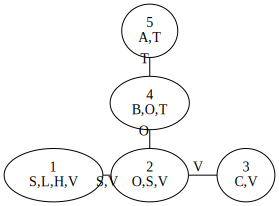

In [ ]:
# Answer

class JoinTree(EliminationTree):
    def __init__(self, graph, clusters, separators):
        self.graph = graph
        self.separators = separators # dict mapping each edge (node1, node2) -> tuple of separator vars
        self.clusters = clusters

        self.messages = None

    def show(self, positions=None):
        '''
        A specialised function to show JoinTrees, including the separators and clusters
        '''
        dot = graphviz.Graph(engine="neato", comment='Undirected graph', strict=True)        
        dot.attr(overlap="false", splines="true")
        for v in self.graph:
            if positions is not None:
                dot.node(str(v), label=str(v)+'\n'+','.join(self.clusters[v]), pos=positions[v])
            else:
                dot.node(str(v), label=str(v)+'\n'+','.join(self.clusters[v]))
        for v in self.graph:
            for w in self.graph.children(v):
                if v < w:
                    dot.edge(str(v), str(w), ','.join(self.separators[str(v)+str(w)]))

        return dot
    


G = Graph({
    '1': ('2',),
    '2': ('1', '3', '4'),
    '3': ('2',),
    '4': ('2', '5'),
    '5': ('4',),
})

S = {
    '12': ('S', 'V'),
    '23': ('V',),
    '24': ('O',),
    '45': ('T',),
}

C = {
    '1': ('S', 'L', 'H', 'V'),
    '2': ('O', 'S', 'V'),
    '3': ('C', 'V'),
    '4': ('B', 'O', 'T'),
    '5': ('A', 'T'),
}

jt = JoinTree(G, C, S)

##############
# Test code

pos = {
    '1': '0,0!',
    '2': '2,0!',
    '3': '4,0!',
    '4': '2,1.5!',
    '5': '2,3!',
}
jt.show(positions=pos)

Next we need to modify the `__init__` function so that it initializes a trivial factor for each cluster.

The idea is that we will start with these trivial factors and design a function to assign network factors to clusters. If one factor ends with no assigned function, the trivial factor will be used to provide the correct computations.

## Exercise

Implement a function that creates one trivial factor for each jointree cluster.

In [ ]:
class JoinTree(JoinTree):
    def __init__(self, graph, clusters, separators, outcomeSpace):
        self.graph = graph
        self.separators = separators # dict mapping each edge node1+node2 -> tuple of separator vars
        self.clusters = clusters
        self.outcomeSpace = outcomeSpace

        self.factors = {}
        for node in self.graph:
            # trivial factor over cluster (Factor's initialize to all 1's by default)
            self.factors[node] = ... # TODO 1 line

        self.messages = None

In [ ]:
# Answer

class JoinTree(JoinTree):
    def __init__(self, graph, clusters, separators, outcomeSpace):
        self.graph = graph
        self.separators = separators # dict mapping each edge node1+node2 -> tuple of separator vars
        self.clusters = clusters
        self.outcomeSpace = outcomeSpace

        self.factors = {}
        for node in self.graph:
            # trivial factor (Factor's initialize to all 1's by default)
            self.factors[node] = Factor(self.clusters[node], outcomeSpace) 

        self.messages = None

Now, we will implement the function that associates the network factors to jointree clusters. Each factor **must** be assigned to one cluster in the jointree. This property is called *family preservation*. If we cannot find a cluster that can have a network factor then our jointree is incorrect (see the jointree property 2 - "Each factor in $G$ must appear in some cluster $\textbf{C}_i$". We raise an exception is this case.

## Exercise

Complete the implementation of the function ``distribute_factors``.

In [ ]:
class JoinTree(JoinTree):
    def distribute_factors(self, factor_list):
        '''
        Takes a list of factors and adds them one by one to the jointree
        '''
        for factor in factor_list:
            for node in self.graph:
                # We will find a match if the factor domain is a subset of the cluster domain
                if ...: # TODO use python sets
                    # Join factor into cluster
                    ... # TODO 1 line
                    break
            else:
                # This else clause will only be executed if the for loop reaches the end. Google "python for/else" for more info
                raise NameError('FamilyPreservationError')

###################
# Test code

jt = JoinTree(G, C, S, outcomeSpace)
jt.distribute_factors(factor_dict.values())
jt.evidence(B=1)
jt.getMessages()
print(jt.queryCluster('5', ('A',)))

AttributeError: 'JoinTree' object has no attribute 'evidence'

In [ ]:
# Answer

class JoinTree(JoinTree):
    def distribute_factors(self, factor_list):
        '''
        Takes a list of factors and adds them one by one to the jointree
        '''
        for factor in factor_list:
            for node in self.graph:
                # We will find a match if the factor domain is a subset of the cluster (trivial factor) domain
                if set(factor.domain).issubset(self.clusters[node]):
                    self.factors[node] *= factor
                    break
            else:
                # This else clause will only be executed if the for loop reaches the end. Google "python for/else" for more info
                raise NameError('FamilyPreservationError')

###################
# Test code

jt = JoinTree(G, C, S, outcomeSpace)
jt.distribute_factors(factor_dict.values())
jt.evidence(B=1)
jt.getMessages()
print(jt.queryCluster('5', ('A',)))

╒═════╤═════════════╕
│   A │          Pr │
╞═════╪═════════════╡
│   0 │ 0.179175    │
├─────┼─────────────┤
│   1 │ 0.000642448 │
╘═════╧═════════════╛



If your code is correct, the answer to the query should be:
```
╒═════╤═════════════╕
│   A │          Pr │
╞═════╪═════════════╡
│   0 │ 0.179175    │
├─────┼─────────────┤
│   1 │ 0.000642448 │
╘═════╧═════════════╛
```


Great! We have reached the end of this tutorial.

There are some extensions that we can work on, to make this code more complete.

1. We need to design a smart way to recompute messages when we change the evidence. We do not have to recompute all messages as we discussed in the lectures.

2. We could make the query more user-friendly if we could find the cluster that has the answer automatically. Also, we could generate an exception if no cluster has all the queries variables.

3. We can implement the jointree operations to modify the jointree structure so that we can adjust the clusters to our query needs. The operations are add variable as well as merge, add and remove clusters.

See you next week!